In [1]:
import pandas as pd
import tensorflow as tf
from tensorflow import keras
import numpy as np
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv("F:\PGDDS\PGD_Data_Science\csv_data\customerchurn.csv")

In [3]:
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [5]:
df.shape

(7043, 21)

In [6]:
df.isnull().sum()

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

In [7]:
df.describe()

,SeniorCitizen,tenure,MonthlyCharges
count,7043.000000,7043.000000,7043.000000
mean,0.162147,32.371149,64.761692
std,0.368612,24.559481,30.090047
min,0.000000,0.000000,18.250000
25%,0.000000,9.000000,35.500000
50%,0.000000,29.000000,70.350000
75%,0.000000,55.000000,89.850000
max,1.000000,72.000000,118.750000


In [8]:
df.drop("customerID", axis = 1, inplace = True)

In [9]:
df.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [10]:
df.dtypes

gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges         object
Churn                object
dtype: object

In [11]:
df['TotalCharges'].unique()

array(['29.85', '1889.5', '108.15', ..., '346.45', '306.6', '6844.5'],
      dtype=object)

In [12]:
df1= df.copy()

In [13]:
df1['TotalCharges'] = pd.to_numeric(df1['TotalCharges'], errors='coerce')

In [14]:
df.iloc[488]

gender                                 Female
SeniorCitizen                               0
Partner                                   Yes
Dependents                                Yes
tenure                                      0
PhoneService                               No
MultipleLines                No phone service
InternetService                           DSL
OnlineSecurity                            Yes
OnlineBackup                               No
DeviceProtection                          Yes
TechSupport                               Yes
StreamingTV                               Yes
StreamingMovies                            No
Contract                             Two year
PaperlessBilling                          Yes
PaymentMethod       Bank transfer (automatic)
MonthlyCharges                          52.55
TotalCharges                                 
Churn                                      No
Name: 488, dtype: object

In [15]:
pd.to_numeric(df1['TotalCharges'], errors='coerce')[488]

nan

In [16]:
df1.isnull().sum()

gender               0
SeniorCitizen        0
Partner              0
Dependents           0
tenure               0
PhoneService         0
MultipleLines        0
InternetService      0
OnlineSecurity       0
OnlineBackup         0
DeviceProtection     0
TechSupport          0
StreamingTV          0
StreamingMovies      0
Contract             0
PaperlessBilling     0
PaymentMethod        0
MonthlyCharges       0
TotalCharges        11
Churn                0
dtype: int64

In [17]:
df1.dropna(inplace = True)

In [18]:
df1.isnull().sum()

gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

In [19]:
df1.shape

(7032, 20)

In [20]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7032 entries, 0 to 7042
Data columns (total 20 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   gender            7032 non-null   object 
 1   SeniorCitizen     7032 non-null   int64  
 2   Partner           7032 non-null   object 
 3   Dependents        7032 non-null   object 
 4   tenure            7032 non-null   int64  
 5   PhoneService      7032 non-null   object 
 6   MultipleLines     7032 non-null   object 
 7   InternetService   7032 non-null   object 
 8   OnlineSecurity    7032 non-null   object 
 9   OnlineBackup      7032 non-null   object 
 10  DeviceProtection  7032 non-null   object 
 11  TechSupport       7032 non-null   object 
 12  StreamingTV       7032 non-null   object 
 13  StreamingMovies   7032 non-null   object 
 14  Contract          7032 non-null   object 
 15  PaperlessBilling  7032 non-null   object 
 16  PaymentMethod     7032 non-null   object 


In [21]:
df1.head(2)

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,No


In [22]:
df1['gender'].unique()

array(['Female', 'Male'], dtype=object)

In [23]:
for i in df1:
    print(df1[i].unique())

['Female' 'Male']
[0 1]
['Yes' 'No']
['No' 'Yes']
[ 1 34  2 45  8 22 10 28 62 13 16 58 49 25 69 52 71 21 12 30 47 72 17 27
  5 46 11 70 63 43 15 60 18 66  9  3 31 50 64 56  7 42 35 48 29 65 38 68
 32 55 37 36 41  6  4 33 67 23 57 61 14 20 53 40 59 24 44 19 54 51 26 39]
['No' 'Yes']
['No phone service' 'No' 'Yes']
['DSL' 'Fiber optic' 'No']
['No' 'Yes' 'No internet service']
['Yes' 'No' 'No internet service']
['No' 'Yes' 'No internet service']
['No' 'Yes' 'No internet service']
['No' 'Yes' 'No internet service']
['No' 'Yes' 'No internet service']
['Month-to-month' 'One year' 'Two year']
['Yes' 'No']
['Electronic check' 'Mailed check' 'Bank transfer (automatic)'
 'Credit card (automatic)']
[29.85 56.95 53.85 ... 63.1  44.2  78.7 ]
[  29.85 1889.5   108.15 ...  346.45  306.6  6844.5 ]
['No' 'Yes']


In [24]:
for i in df1:
    print(i, ":", df1[i].unique())

gender : ['Female' 'Male']
SeniorCitizen : [0 1]
Partner : ['Yes' 'No']
Dependents : ['No' 'Yes']
tenure : [ 1 34  2 45  8 22 10 28 62 13 16 58 49 25 69 52 71 21 12 30 47 72 17 27
  5 46 11 70 63 43 15 60 18 66  9  3 31 50 64 56  7 42 35 48 29 65 38 68
 32 55 37 36 41  6  4 33 67 23 57 61 14 20 53 40 59 24 44 19 54 51 26 39]
PhoneService : ['No' 'Yes']
MultipleLines : ['No phone service' 'No' 'Yes']
InternetService : ['DSL' 'Fiber optic' 'No']
OnlineSecurity : ['No' 'Yes' 'No internet service']
OnlineBackup : ['Yes' 'No' 'No internet service']
DeviceProtection : ['No' 'Yes' 'No internet service']
TechSupport : ['No' 'Yes' 'No internet service']
StreamingTV : ['No' 'Yes' 'No internet service']
StreamingMovies : ['No' 'Yes' 'No internet service']
Contract : ['Month-to-month' 'One year' 'Two year']
PaperlessBilling : ['Yes' 'No']
PaymentMethod : ['Electronic check' 'Mailed check' 'Bank transfer (automatic)'
 'Credit card (automatic)']
MonthlyCharges : [29.85 56.95 53.85 ... 63.1  44.2  78

In [25]:
df1.replace('No phone service', 'No', inplace = True)

In [26]:
df1.replace('No internet service', 'No', inplace = True)

In [27]:
for i in df1:
    print(i, ":", df1[i].unique())

gender : ['Female' 'Male']
SeniorCitizen : [0 1]
Partner : ['Yes' 'No']
Dependents : ['No' 'Yes']
tenure : [ 1 34  2 45  8 22 10 28 62 13 16 58 49 25 69 52 71 21 12 30 47 72 17 27
  5 46 11 70 63 43 15 60 18 66  9  3 31 50 64 56  7 42 35 48 29 65 38 68
 32 55 37 36 41  6  4 33 67 23 57 61 14 20 53 40 59 24 44 19 54 51 26 39]
PhoneService : ['No' 'Yes']
MultipleLines : ['No' 'Yes']
InternetService : ['DSL' 'Fiber optic' 'No']
OnlineSecurity : ['No' 'Yes']
OnlineBackup : ['Yes' 'No']
DeviceProtection : ['No' 'Yes']
TechSupport : ['No' 'Yes']
StreamingTV : ['No' 'Yes']
StreamingMovies : ['No' 'Yes']
Contract : ['Month-to-month' 'One year' 'Two year']
PaperlessBilling : ['Yes' 'No']
PaymentMethod : ['Electronic check' 'Mailed check' 'Bank transfer (automatic)'
 'Credit card (automatic)']
MonthlyCharges : [29.85 56.95 53.85 ... 63.1  44.2  78.7 ]
TotalCharges : [  29.85 1889.5   108.15 ...  346.45  306.6  6844.5 ]
Churn : ['No' 'Yes']


In [28]:
df1.replace({'Yes' : 1, 'No':0, "Female":0, "Male":1}, inplace = True)

In [29]:
df1.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,0,0,1,0,1,0,0,DSL,0,1,0,0,0,0,Month-to-month,1,Electronic check,29.85,29.85,0
1,1,0,0,0,34,1,0,DSL,1,0,1,0,0,0,One year,0,Mailed check,56.95,1889.50,0
2,1,0,0,0,2,1,0,DSL,1,1,0,0,0,0,Month-to-month,1,Mailed check,53.85,108.15,1
3,1,0,0,0,45,0,0,DSL,1,0,1,1,0,0,One year,0,Bank transfer (automatic),42.30,1840.75,0
4,0,0,0,0,2,1,0,Fiber optic,0,0,0,0,0,0,Month-to-month,1,Electronic check,70.70,151.65,1


In [30]:
final = pd.get_dummies(data = df1, drop_first=True)

In [31]:
final.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,OnlineSecurity,OnlineBackup,DeviceProtection,...,MonthlyCharges,TotalCharges,Churn,InternetService_DSL,InternetService_Fiber optic,Contract_One year,Contract_Two year,PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
0,0,0,1,0,1,0,0,0,1,0,...,29.85,29.85,0,1,0,0,0,0,1,0
1,1,0,0,0,34,1,0,1,0,1,...,56.95,1889.50,0,1,0,1,0,0,0,1
2,1,0,0,0,2,1,0,1,1,0,...,53.85,108.15,1,1,0,0,0,0,0,1
3,1,0,0,0,45,0,0,1,0,1,...,42.30,1840.75,0,1,0,1,0,0,0,0
4,0,0,0,0,2,1,0,0,0,0,...,70.70,151.65,1,0,1,0,0,0,1,0


In [32]:
final.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7032 entries, 0 to 7042
Data columns (total 24 columns):
 #   Column                                 Non-Null Count  Dtype  
---  ------                                 --------------  -----  
 0   gender                                 7032 non-null   int64  
 1   SeniorCitizen                          7032 non-null   int64  
 2   Partner                                7032 non-null   int64  
 3   Dependents                             7032 non-null   int64  
 4   tenure                                 7032 non-null   int64  
 5   PhoneService                           7032 non-null   int64  
 6   MultipleLines                          7032 non-null   int64  
 7   OnlineSecurity                         7032 non-null   int64  
 8   OnlineBackup                           7032 non-null   int64  
 9   DeviceProtection                       7032 non-null   int64  
 10  TechSupport                            7032 non-null   int64  
 11  Stre

In [33]:
tenure0 = final[final['Churn'] == 0].tenure

In [34]:
tenure0

0        1
1       34
3       45
6       22
7       10
        ..
7037    72
7038    24
7039    72
7040    11
7042    66
Name: tenure, Length: 5163, dtype: int64

In [35]:
tenure1 = final[final['Churn'] == 1].tenure

In [36]:
tenure1

2        2
4        2
5        8
8       28
13      49
        ..
7021    12
7026     9
7032     1
7034    67
7041     4
Name: tenure, Length: 1869, dtype: int64

In [37]:
import matplotlib.pyplot as plt

Text(0.5, 1.0, 'Tenure analysis')

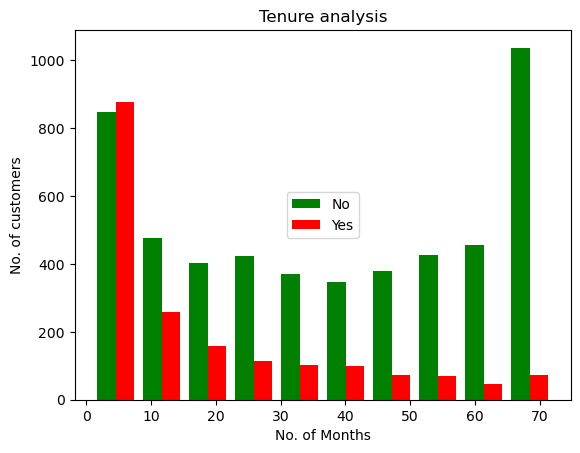

In [38]:
plt.hist([tenure0, tenure1], color = ['green', 'red'], label = ['No', 'Yes'])
plt.xlabel("No. of Months")
plt.ylabel("No. of customers")
plt.legend(loc = "center")
plt.title("Tenure analysis")

- for monthly charges

In [39]:
monthlyChareges0 = final[final['Churn'] == 0].MonthlyCharges
monthlyChareges1 = final[final['Churn'] == 1].MonthlyCharges

Text(0.5, 1.0, 'Monthly charges analysis')

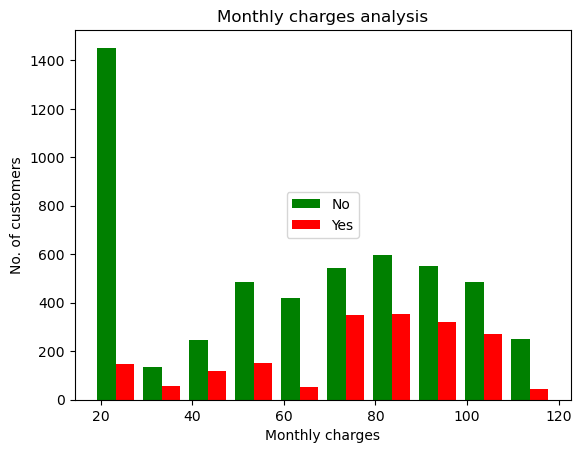

In [40]:
plt.hist([monthlyChareges0, monthlyChareges1], color = ['green', 'red'], label = ['No', 'Yes'])
plt.xlabel("Monthly charges")
plt.ylabel("No. of customers")
plt.legend(loc = "center")
plt.title("Monthly charges analysis")

In [41]:
final.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,OnlineSecurity,OnlineBackup,DeviceProtection,...,MonthlyCharges,TotalCharges,Churn,InternetService_DSL,InternetService_Fiber optic,Contract_One year,Contract_Two year,PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
0,0,0,1,0,1,0,0,0,1,0,...,29.85,29.85,0,1,0,0,0,0,1,0
1,1,0,0,0,34,1,0,1,0,1,...,56.95,1889.50,0,1,0,1,0,0,0,1
2,1,0,0,0,2,1,0,1,1,0,...,53.85,108.15,1,1,0,0,0,0,0,1
3,1,0,0,0,45,0,0,1,0,1,...,42.30,1840.75,0,1,0,1,0,0,0,0
4,0,0,0,0,2,1,0,0,0,0,...,70.70,151.65,1,0,1,0,0,0,1,0


In [42]:
final.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7032 entries, 0 to 7042
Data columns (total 24 columns):
 #   Column                                 Non-Null Count  Dtype  
---  ------                                 --------------  -----  
 0   gender                                 7032 non-null   int64  
 1   SeniorCitizen                          7032 non-null   int64  
 2   Partner                                7032 non-null   int64  
 3   Dependents                             7032 non-null   int64  
 4   tenure                                 7032 non-null   int64  
 5   PhoneService                           7032 non-null   int64  
 6   MultipleLines                          7032 non-null   int64  
 7   OnlineSecurity                         7032 non-null   int64  
 8   OnlineBackup                           7032 non-null   int64  
 9   DeviceProtection                       7032 non-null   int64  
 10  TechSupport                            7032 non-null   int64  
 11  Stre

In [43]:
X = final.drop("Churn", axis = 1)

In [44]:
X.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,OnlineSecurity,OnlineBackup,DeviceProtection,...,PaperlessBilling,MonthlyCharges,TotalCharges,InternetService_DSL,InternetService_Fiber optic,Contract_One year,Contract_Two year,PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
0,0,0,1,0,1,0,0,0,1,0,...,1,29.85,29.85,1,0,0,0,0,1,0
1,1,0,0,0,34,1,0,1,0,1,...,0,56.95,1889.50,1,0,1,0,0,0,1
2,1,0,0,0,2,1,0,1,1,0,...,1,53.85,108.15,1,0,0,0,0,0,1
3,1,0,0,0,45,0,0,1,0,1,...,0,42.30,1840.75,1,0,1,0,0,0,0
4,0,0,0,0,2,1,0,0,0,0,...,1,70.70,151.65,0,1,0,0,0,1,0


In [45]:
y = final.Churn

In [46]:
y.head()

0    0
1    0
2    1
3    0
4    1
Name: Churn, dtype: int64

In [47]:
from sklearn.preprocessing import MinMaxScaler

In [48]:
scaler = MinMaxScaler()

In [49]:
scaled = scaler.fit_transform(X)

In [50]:
scaled

array([[0., 0., 1., ..., 0., 1., 0.],
       [1., 0., 0., ..., 0., 0., 1.],
       [1., 0., 0., ..., 0., 0., 1.],
       ...,
       [0., 0., 1., ..., 0., 1., 0.],
       [1., 1., 1., ..., 0., 0., 1.],
       [1., 0., 0., ..., 0., 0., 0.]])

In [51]:
scaled.shape

(7032, 23)

In [52]:
from sklearn.model_selection import train_test_split

In [53]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42)

In [54]:
X_train.shape

(5625, 23)

In [55]:
X_test.shape

(1407, 23)

In [56]:
model = keras.Sequential([
    keras.layers.Dense(1, input_shape = (23, ), activation = 'sigmoid')
])

In [57]:
model.compile(optimizer='adam', loss="binary_crossentropy", metrics = ['accuracy'])

In [59]:
model.fit(X_train, y_train, epochs=10)

Epoch 1/10
176/176 [==============================] - 0s 2ms/step - loss: 0.4654 - accuracy: 0.7902
Epoch 2/10
176/176 [==============================] - 0s 2ms/step - loss: 0.4483 - accuracy: 0.7936
Epoch 3/10
176/176 [==============================] - 0s 2ms/step - loss: 0.4317 - accuracy: 0.7989
Epoch 4/10
176/176 [==============================] - 0s 2ms/step - loss: 0.4354 - accuracy: 0.7975
Epoch 5/10
176/176 [==============================] - 0s 2ms/step - loss: 0.4521 - accuracy: 0.7893
Epoch 6/10
176/176 [==============================] - 0s 2ms/step - loss: 0.4413 - accuracy: 0.7956
Epoch 7/10
176/176 [==============================] - 0s 2ms/step - loss: 0.4943 - accuracy: 0.7851
Epoch 8/10
176/176 [==============================] - 0s 2ms/step - loss: 0.4526 - accuracy: 0.7931
Epoch 9/10
176/176 [==============================] - 0s 2ms/step - loss: 0.4505 - accuracy: 0.7931
Epoch 10/10
176/176 [==============================] - 0s 2ms/step - loss: 0.4584 - accuracy: 0.7909

In [60]:
model = keras.Sequential([
    keras.layers.Dense(50, input_shape = (23, ), activation = 'relu', kernel_initializer = 'ones', bias_initializer = 'zeros'),
    keras.layers.Dense(1, activation = 'sigmoid')
])

In [61]:
model.compile(optimizer='adam', loss="binary_crossentropy", metrics = ['accuracy'])

In [62]:
model.fit(X_train, y_train, epochs=25)

Epoch 1/25
176/176 [==============================] - 1s 2ms/step - loss: 24.7696 - accuracy: 0.6690
Epoch 2/25
176/176 [==============================] - 0s 2ms/step - loss: 5.7214 - accuracy: 0.7065
Epoch 3/25
176/176 [==============================] - 0s 2ms/step - loss: 8.2193 - accuracy: 0.7068
Epoch 4/25
176/176 [==============================] - 0s 2ms/step - loss: 5.2263 - accuracy: 0.7268
Epoch 5/25
176/176 [==============================] - 0s 2ms/step - loss: 5.7364 - accuracy: 0.7284
Epoch 6/25
176/176 [==============================] - 0s 2ms/step - loss: 4.8589 - accuracy: 0.7387
Epoch 7/25
176/176 [==============================] - 0s 2ms/step - loss: 5.7936 - accuracy: 0.7305
Epoch 8/25
176/176 [==============================] - 0s 2ms/step - loss: 6.0142 - accuracy: 0.7396
Epoch 9/25
176/176 [==============================] - 0s 2ms/step - loss: 5.3938 - accuracy: 0.7367
Epoch 10/25
176/176 [==============================] - 0s 2ms/step - loss: 6.1942 - accuracy: 0.734

In [63]:
model.fit(X_train, y_train, epochs=100)

Epoch 1/100
176/176 [==============================] - 0s 2ms/step - loss: 6.4429 - accuracy: 0.7380
Epoch 2/100
176/176 [==============================] - 0s 2ms/step - loss: 4.8858 - accuracy: 0.7428
Epoch 3/100
176/176 [==============================] - 0s 2ms/step - loss: 5.0516 - accuracy: 0.7399
Epoch 4/100
176/176 [==============================] - 0s 2ms/step - loss: 3.8388 - accuracy: 0.7529
Epoch 5/100
176/176 [==============================] - 0s 2ms/step - loss: 4.8858 - accuracy: 0.7497
Epoch 6/100
176/176 [==============================] - 0s 2ms/step - loss: 8.7056 - accuracy: 0.7298
Epoch 7/100
176/176 [==============================] - 0s 2ms/step - loss: 4.9901 - accuracy: 0.7483
Epoch 8/100
176/176 [==============================] - 0s 2ms/step - loss: 5.2497 - accuracy: 0.7403
Epoch 9/100
176/176 [==============================] - 0s 2ms/step - loss: 4.4293 - accuracy: 0.7495
Epoch 10/100
176/176 [==============================] - 0s 2ms/step - loss: 5.8146 - accura

In [64]:
model.evaluate(X_test, y_test)

44/44 [==============================] - 0s 2ms/step - loss: 3.1383 - accuracy: 0.6269


[3.1382994651794434, 0.6268656849861145]

In [65]:
predicted = model.predict(X_test)

44/44 [==============================] - 0s 2ms/step


In [66]:
cm = tf.math.confusion_matrix(labels=y_test, predictions=predicted)

In [67]:
import seaborn as sns

<AxesSubplot:>

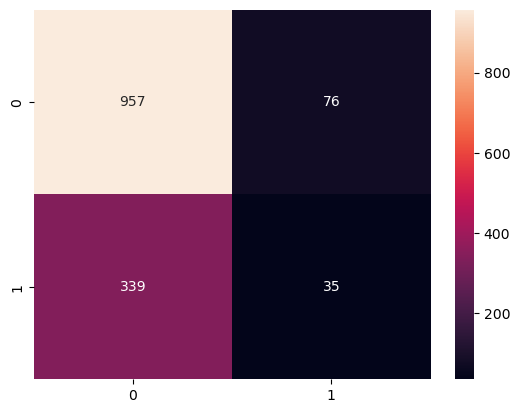

In [68]:
sns.heatmap(cm, annot =  True, fmt= 'd')

In [69]:
final['Churn'].value_counts()

0    5163
1    1869
Name: Churn, dtype: int64

In [70]:
df0 = final[final['Churn'] == 0]
df0

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,OnlineSecurity,OnlineBackup,DeviceProtection,...,MonthlyCharges,TotalCharges,Churn,InternetService_DSL,InternetService_Fiber optic,Contract_One year,Contract_Two year,PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
0,0,0,1,0,1,0,0,0,1,0,...,29.85,29.85,0,1,0,0,0,0,1,0
1,1,0,0,0,34,1,0,1,0,1,...,56.95,1889.50,0,1,0,1,0,0,0,1
3,1,0,0,0,45,0,0,1,0,1,...,42.30,1840.75,0,1,0,1,0,0,0,0
6,1,0,0,1,22,1,1,0,1,0,...,89.10,1949.40,0,0,1,0,0,1,0,0
7,0,0,0,0,10,0,0,1,0,0,...,29.75,301.90,0,1,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7037,0,0,0,0,72,1,0,0,0,0,...,21.15,1419.40,0,0,0,0,1,0,0,0
7038,1,0,1,1,24,1,1,1,0,1,...,84.80,1990.50,0,1,0,1,0,0,0,1
7039,0,0,1,1,72,1,1,0,1,1,...,103.20,7362.90,0,0,1,1,0,1,0,0
7040,0,0,1,1,11,0,0,1,0,0,...,29.60,346.45,0,1,0,0,0,0,1,0


In [71]:
df0.shape

(5163, 24)

In [72]:
df1 = final[final['Churn'] == 1]
df1

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,OnlineSecurity,OnlineBackup,DeviceProtection,...,MonthlyCharges,TotalCharges,Churn,InternetService_DSL,InternetService_Fiber optic,Contract_One year,Contract_Two year,PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
2,1,0,0,0,2,1,0,1,1,0,...,53.85,108.15,1,1,0,0,0,0,0,1
4,0,0,0,0,2,1,0,0,0,0,...,70.70,151.65,1,0,1,0,0,0,1,0
5,0,0,0,0,8,1,1,0,0,1,...,99.65,820.50,1,0,1,0,0,0,1,0
8,0,0,1,0,28,1,1,0,0,1,...,104.80,3046.05,1,0,1,0,0,0,1,0
13,1,0,0,0,49,1,1,0,1,1,...,103.70,5036.30,1,0,1,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7021,1,0,0,0,12,1,0,0,0,0,...,59.80,727.80,1,1,0,1,0,0,1,0
7026,0,0,0,0,9,1,0,0,0,0,...,44.20,403.35,1,1,0,0,0,0,0,0
7032,1,1,0,0,1,1,1,0,0,0,...,75.75,75.75,1,0,1,0,0,0,1,0
7034,0,0,0,0,67,1,1,1,1,1,...,102.95,6886.25,1,0,1,0,0,1,0,0


In [73]:
df1.shape

(1869, 24)

In [74]:
df0_undersample =df0.sample(1869)

In [75]:
df0_undersample.shape

(1869, 24)

In [76]:
undersample = pd.concat([df1, df0_undersample])

In [77]:
undersample.shape

(3738, 24)

In [79]:
col_scale = undersample[['tenure', 'MonthlyCharges', 'TotalCharges']]


In [80]:
undersample[['tenure', 'MonthlyCharges', 'TotalCharges']] = scaler.fit_transform(col_scale)

In [86]:
X_train_min, X_test_min, y_train_min, y_test_min = train_test_split(undersample.drop("Churn",axis =1), undersample.Churn, test_size=0.20, random_state=42)

In [87]:
X_train_min.shape

(2990, 23)

In [88]:
model = keras.Sequential([
    keras.layers.Dense(1, input_shape = (23, ), activation = 'sigmoid')
])
model.compile(optimizer='adam', loss="binary_crossentropy", metrics = ['accuracy'])

In [89]:
model.fit(X_train_min, y_train_min, epochs=25)

Epoch 1/25
94/94 [==============================] - 1s 2ms/step - loss: 0.7019 - accuracy: 0.5699
Epoch 2/25
94/94 [==============================] - 0s 2ms/step - loss: 0.6574 - accuracy: 0.6294
Epoch 3/25
94/94 [==============================] - 0s 2ms/step - loss: 0.6239 - accuracy: 0.6739
Epoch 4/25
94/94 [==============================] - 0s 2ms/step - loss: 0.5982 - accuracy: 0.6997
Epoch 5/25
94/94 [==============================] - 0s 2ms/step - loss: 0.5787 - accuracy: 0.7077
Epoch 6/25
94/94 [==============================] - 0s 2ms/step - loss: 0.5637 - accuracy: 0.7258
Epoch 7/25
94/94 [==============================] - 0s 2ms/step - loss: 0.5520 - accuracy: 0.7371
Epoch 8/25
94/94 [==============================] - 0s 2ms/step - loss: 0.5427 - accuracy: 0.7381
Epoch 9/25
94/94 [==============================] - 0s 2ms/step - loss: 0.5353 - accuracy: 0.7452
Epoch 10/25
94/94 [==============================] - 0s 2ms/step - loss: 0.5295 - accuracy: 0.7505
Epoch 11/25
94/94 [

In [90]:
model.evaluate(X_test_min, y_test_min)

24/24 [==============================] - 0s 2ms/step - loss: 0.4978 - accuracy: 0.7620


[0.49776947498321533, 0.7620320916175842]

In [91]:
predicted_min = model.predict(X_test_min)

24/24 [==============================] - 0s 1ms/step


<AxesSubplot:>

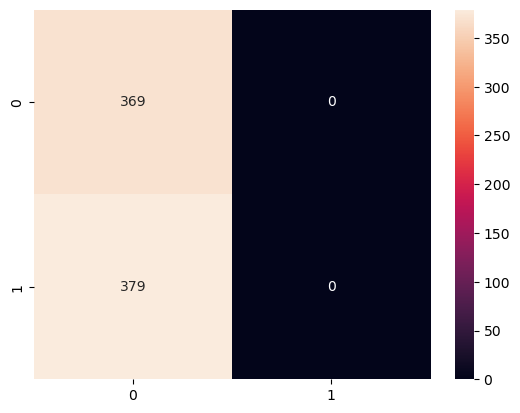

In [95]:
cm = tf.math.confusion_matrix(labels=y_test_min, predictions=predicted_min)
sns.heatmap(cm, annot = True, fmt = 'd')

- Oversampling (Majority)

In [96]:
sum1, sum0 = final['Churn'].value_counts()

In [97]:
sum1

5163

In [98]:
sum0

1869

- Have to create sample 5163 from 1869

In [99]:
df1_oversample = df1.sample(sum1, replace=True)

In [102]:
df1_oversample.shape

(5163, 24)

- SMOTE

In [103]:
!pip install imbalanced_learn

     -------------------------------------- 226.0/226.0 kB 3.4 MB/s eta 0:00:00
  Using cached joblib-1.2.0-py3-none-any.whl (297 kB)
  Attempting uninstall: joblib
    Found existing installation: joblib 1.1.0
    Uninstalling joblib-1.1.0:
      Successfully uninstalled joblib-1.1.0


In [1]:
from imblearn.over_sampling import SMOTE

In [2]:
smote = SMOTE(sampling_strategy='minority')

In [110]:
X = final.drop('Churn', axis = 1)
y = final.Churn

In [111]:
X_sm, y_sm = smote.fit_resample(X, y)

In [113]:
X_sm.shape

(10326, 23)

In [114]:
y_sm.shape

(10326,)

In [115]:
 X_train, X_test, y_train, y_test = train_test_split(X_sm, y_sm, test_size=0.20, random_state=42)

In [116]:
model = keras.Sequential([
    keras.layers.Dense(20, input_shape = (23, ), activation = 'relu'),
    keras.layers.Dense(1, activation = 'sigmoid')
])

In [117]:
model.compile(optimizer='adam', loss="binary_crossentropy", metrics = ['accuracy'])

In [118]:
model.fit(X_train, y_train, epochs=50)

Epoch 1/50
259/259 [==============================] - 1s 2ms/step - loss: 5.8799 - accuracy: 0.6184
Epoch 2/50
259/259 [==============================] - 1s 2ms/step - loss: 0.5266 - accuracy: 0.7665
Epoch 3/50
259/259 [==============================] - 0s 2ms/step - loss: 0.6217 - accuracy: 0.7677
Epoch 4/50
259/259 [==============================] - 0s 2ms/step - loss: 0.5177 - accuracy: 0.7798
Epoch 5/50
259/259 [==============================] - 0s 2ms/step - loss: 0.5998 - accuracy: 0.7726
Epoch 6/50
259/259 [==============================] - 0s 2ms/step - loss: 0.5877 - accuracy: 0.7828
Epoch 7/50
259/259 [==============================] - 0s 2ms/step - loss: 0.4755 - accuracy: 0.8046
Epoch 8/50
259/259 [==============================] - 0s 2ms/step - loss: 0.7459 - accuracy: 0.7685
Epoch 9/50
259/259 [==============================] - 0s 2ms/step - loss: 0.5598 - accuracy: 0.7883
Epoch 10/50
259/259 [==============================] - 0s 2ms/step - loss: 0.4893 - accuracy: 0.8022

In [125]:
import pandas as pd

In [120]:
y_pred = model.predict(X_test)

65/65 [==============================] - 0s 1ms/step


In [121]:
y_pred

array([[4.3546164e-01],
       [7.6699971e-06],
       [8.4999854e-05],
       ...,
       [8.9238483e-01],
       [6.0663182e-01],
       [1.9272348e-01]], dtype=float32)

In [122]:
l1 = []
for i in y_pred:
    if i > 0.5:
        l1.append(1)
    else:
        l1.append(0)

In [123]:
l1

[0,
 0,
 0,
 0,
 0,
 1,
 1,
 0,
 1,
 0,
 1,
 1,
 0,
 1,
 1,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 1,
 1,
 1,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 1,
 1,
 0,
 1,
 0,
 0,
 1,
 1,
 1,
 0,
 1,
 1,
 1,
 0,
 0,
 1,
 1,
 0,
 1,
 1,
 0,
 1,
 0,
 1,
 1,
 1,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 1,
 1,
 1,
 0,
 1,
 0,
 0,
 0,
 1,
 1,
 0,
 1,
 1,
 1,
 0,
 0,
 1,
 1,
 0,
 1,
 1,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 1,
 1,
 0,
 0,
 1,
 0,
 0,
 1,
 1,
 1,
 0,
 0,
 1,
 0,
 0,
 0,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 0,
 0,
 1,
 1,
 1,
 1,
 0,
 1,
 1,
 1,
 0,
 1,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 1,
 1,
 0,
 1,
 0,
 0,
 1,
 1,
 1,
 1,
 0,
 0,
 1,
 1,
 0,
 0,
 1,
 0,
 1,
 1,
 0,
 0,
 0,
 1,
 1,
 0,
 0,
 1,
 1,
 1,
 0,
 1,
 1,
 0,
 0,
 0,
 0,
 1,
 1,
 1,
 0,
 1,
 0,
 0,
 0,
 0,
 1,
 1,
 1,
 0,
 1,
 1,
 1,
 1,
 1,
 0,
 1,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 1,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 1,
 1,
 1,
 0,
 0,
 0,
 1,
 1,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 1,
 0,
 1,
 0,
 1,
 0,
 0,
 1,
 0,
 1,
 1,
 0,
 1,
 0,
 0,
 1,


In [130]:
from sklearn.metrics import classification_report

In [131]:
print(classification_report(y_test, l1))

              precision    recall  f1-score   support

           0       0.78      0.86      0.82      1037
           1       0.85      0.76      0.80      1029

    accuracy                           0.81      2066
   macro avg       0.82      0.81      0.81      2066
weighted avg       0.82      0.81      0.81      2066

